In [1]:
import pandas as pd
from datetime import datetime

In [4]:
data = pd.read_csv('bank_transactions.csv.zip')
data.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.00
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.00
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50
5,T6,C1536588,8/10/72,F,ITANAGAR,53609.20,2/8/16,173940,676.00
6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566.00
7,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,170537,148.00
8,T9,C8536061,19/4/88,F,GURGAON,14906.96,2/8/16,192825,833.00
9,T10,C6638934,22/6/84,M,MUMBAI,4279.22,2/8/16,192446,289.11


In [5]:
data.shape

(1048567, 9)

In [9]:
# drop all missing values - they are not that many 
data.dropna(inplace=True)

In [6]:
# handling dates
data.CustomerDOB = pd.to_datetime(data.CustomerDOB)

In [12]:
data.TransactionDate = pd.to_datetime(data.TransactionDate)

<AxesSubplot:>

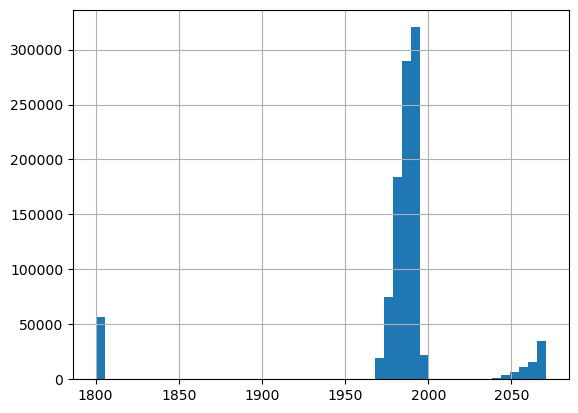

In [13]:
data.CustomerDOB.dt.year.hist(bins=50)

In [14]:
data.loc[data.CustomerDOB.dt.year > 2000, 'CustomerDOB'] = data.loc[data.CustomerDOB.dt.year > 2000, 'CustomerDOB'] - pd.DateOffset(years = 100)
# drop the customers that have year = 1800
data.drop(data[data.CustomerDOB.dt.year == 1800].index, axis=0, inplace=True)

<AxesSubplot:>

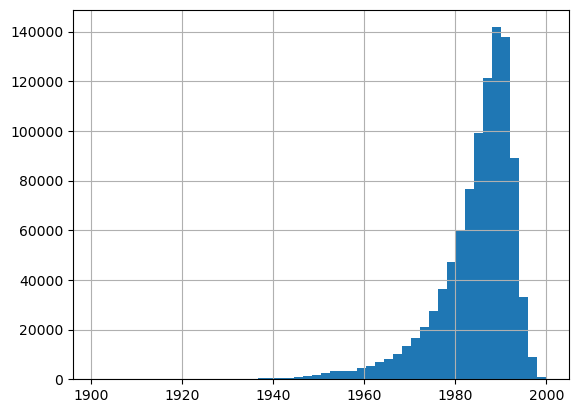

In [15]:
data.CustomerDOB.dt.year.hist(bins=50)

In [22]:
# handling
data.TransactionTime = data.TransactionTime.apply(lambda x: datetime.strptime(str(x).zfill(6), '%H%M%S').time())

# Customer Transactions

<AxesSubplot:>

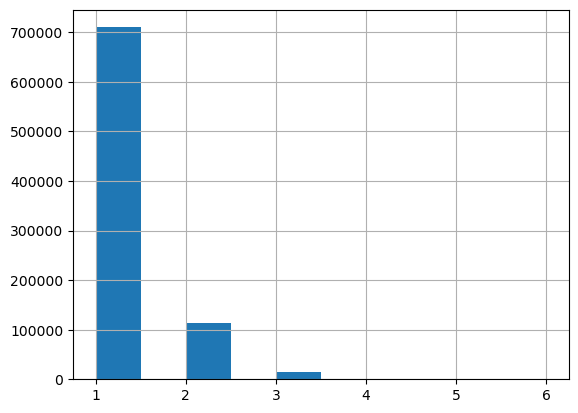

In [20]:
data.groupby('CustomerID').TransactionID.count().hist()

In [26]:
transPerCust = data.groupby('CustomerID').count()

In [27]:
transPerCust.head(10)

,TransactionID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
CustomerID,,,,,,,,
C1010011,2,2,2,2,2,2,2,2
C1010012,1,1,1,1,1,1,1,1
C1010014,2,2,2,2,2,2,2,2
C1010018,1,1,1,1,1,1,1,1
C1010024,1,1,1,1,1,1,1,1
C1010028,1,1,1,1,1,1,1,1
C1010031,2,2,2,2,2,2,2,2
C1010035,2,2,2,2,2,2,2,2
C1010036,1,1,1,1,1,1,1,1


In [ ]:
data.groupby('CustomerID').TransactionID.count().sort_values()

CustomerID
C5031144    1
C6142728    1
C6142735    1
C6142737    1
C6142746    1
           ..
C1026833    6
C6735477    6
C6624352    6
C1736254    6
C3226689    6
Name: TransactionID, Length: 839081, dtype: int64

In [23]:
data[data.CustomerID == 'C3226689']

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
19882,T19883,C3226689,1990-01-01,M,BASTI,11369.40,2016-09-26,13:13:42,200.00
35613,T35614,C3226689,1987-09-15,M,NOIDA,96820.46,2016-09-30,14:50:16,418.00
218661,T218662,C3226689,1984-04-11,F,NEW DELHI,1667.83,2016-08-08,19:02:33,4700.00
756541,T756542,C3226689,1972-09-17,M,SHARJAH,588826.94,2016-01-09,16:55:54,6351.39
836123,T836124,C3226689,1977-07-20,M,THANE,369.36,2016-04-09,13:46:45,1749.00
984048,T984049,C3226689,1985-05-21,M,GURGAON,12977.22,2016-09-15,19:59:29,1340.00


There is a mistake here .....
- we have 6 transactions with the same customer ID but different date of birth and different gender

- We should explore it more
.......

# MinHash

Choosing the features to characterize a single customer